In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Zaid\Desktop\ADS1001\housing.csv')
data=data.dropna()
data = pd.DataFrame(data)
data.rename(columns={'MEDV':'PRICE'}, inplace=True)
data.head()
data = data.drop(['CHAS','B'], axis = 1)


In [3]:

X = data[['CRIM','ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','LSTAT']]
y = data['PRICE']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print(regressor.intercept_)

48.61890758027898


In [6]:
print(regressor.coef_)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

[-1.27998063e-01  5.86185394e-02  4.46284109e-02 -2.09842446e+01
  2.86918042e+00  9.24396091e-03 -1.50910990e+00  3.17162992e-01
 -1.25201445e-02 -1.00525266e+00 -5.81493177e-01]


,Coefficient
CRIM,-0.127998
ZN,0.058619
INDUS,0.044628
NOX,-20.984245
RM,2.869180
AGE,0.009244
DIS,-1.509110
RAD,0.317163
TAX,-0.012520
PTRATIO,-1.005253


In [7]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

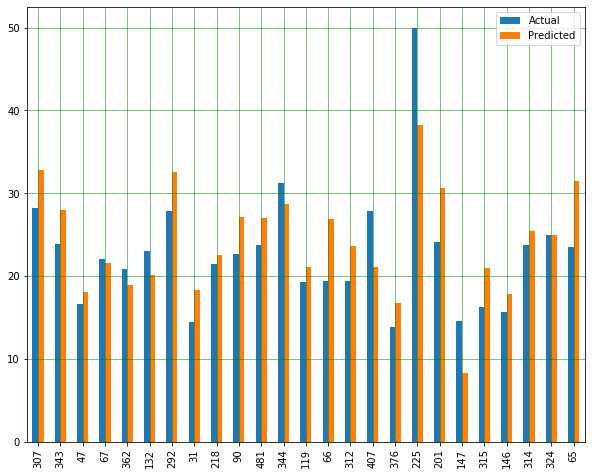

In [8]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3.714535868415684
Mean Squared Error: 23.52701634550846
Root Mean Squared Error: 4.850465580282831


In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [11]:

rms = sqrt(mean_squared_error(y_test, y_pred))

In [12]:
rms

4.850465580282831

In [43]:
# Now lets cross validate the data
# cross validate means to test/train different portions of the data everytime 
# cv = a number which controls the amount of times we split the data/ higher = better but not always
# explanation of cross validation in google docs
from sklearn.model_selection import cross_val_score
cross_val_score(regressor, X, y, cv=100,  scoring='neg_root_mean_squared_error')

# The actual MSE of each cross validation/trial is simply the positive version of the number we're getting.

array([ -5.3493664 ,  -4.35797255,  -1.33608534,  -1.65625373,
        -0.70207041,  -3.15765688,  -1.78367584,  -1.78200645,
        -2.97686217,  -3.50679975,  -1.3327867 ,  -5.82128109,
        -2.89122578,  -1.70103127,  -2.14477936,  -2.11522187,
        -4.60365737,  -5.53235033,  -4.71847675,  -2.15125847,
        -1.80625339,  -3.99190981,  -2.39635037,  -2.32077648,
        -0.80232622,  -2.02296153,  -1.43363934,  -6.12971214,
        -5.2983632 ,  -3.20141287,  -5.03441392, -10.11269113,
        -6.87974088,  -4.35221507,  -3.82661011,  -5.01943442,
        -7.05848321,  -4.59414777,  -3.1313985 ,  -5.58845963,
        -3.90305371,  -7.02551633,  -2.80979799,  -5.58474483,
        -5.16816086,  -5.34530256,  -4.34361053,  -3.5726907 ,
        -2.73239066,  -6.8609268 ,  -4.78746839,  -5.279481  ,
        -4.73413261,  -2.71942571,  -2.88587895,  -5.64492602,
        -4.07855456,  -2.76827032,  -4.59850742,  -3.76517943,
        -4.37152131,  -4.22794488,  -1.0440426 ,  -1.56

In [42]:

score = cross_val_score(regressor, X, y, cv=100, scoring='neg_root_mean_squared_error')
abs(np.mean(score))

# which is 21.54% larger than the mean PRICE and similar to our initial RMSE, meaning our model is atleast consistant but maybe not accurate

4.246666088812031